In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
CAPACITY_DATA = "../Data/Energy Capacity/Scraping Results/final_results.shp"
BUS_ROUTES = "../Data/Bus Routes/Projected"
OUTPUT = "../Data/Energy Capacity/Route Data/"

In [4]:
city_data = gpd.read_file(CAPACITY_DATA)
city_data.crs = {'init': 'epsg:4326', 'no_defs': True}
city_data = city_data.to_crs("EPSG:32614")

C:\Users\rahej\.conda\envs\machinelearning\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
bus_route_files = []
for e in os.listdir(BUS_ROUTES):
    if ".shp" in e:
        bus_route_files.append(e)

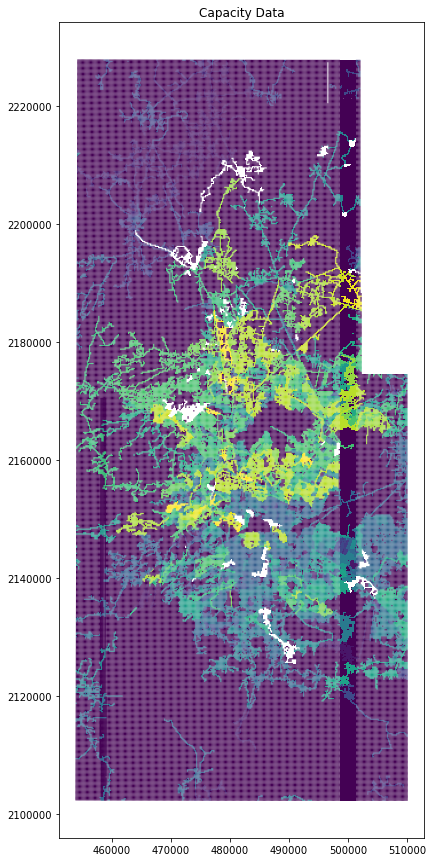

In [6]:
fig, ax = plt.subplots(figsize = (10,15))
ax.set_title('Capacity Data')
city_data.plot(ax=ax, column = 'capacidadD')

In [7]:
for file in tqdm(bus_route_files):
    path = os.path.join(BUS_ROUTES,file)
    df = gpd.read_file(path)

    df_buffered = df.copy()
    buffered_geom = [e.buffer(20) for e in df['geometry']]
    df_buffered['geometry'] = buffered_geom
    result = gpd.overlay(df_buffered,city_data,how='intersection')

    result.to_file(os.path.join(OUTPUT,file))
    

100%|██████████████████████| 109/109 [10:43:37<00:00, 354.29s/it]
